# Applied Machine Learning (INFR11211) 

# Lab 2: Data Exploration

In this lab we will perform exploratory data analysis, visualisation with the spam filtering dataset used in Lab 1. 
Then we will implement an unsupervised learning algotirhm called principal component analysis (PCA) on the Landsat dataset.
All the datasets that you will need for this lab are located within the `datasets` directory.

Let's import the packages:

In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.api.types import CategoricalDtype
%matplotlib inline

*Clarification*:

* The `%matplotlib inline` command is a special ipython [built in magic command](http://ipython.readthedocs.io/en/stable/interactive/magics.html) which forces the matplotlib plots to be rendered within the notebook.

## Part 1: Data analysis and visualisation with Spambase dataset

Following Lab 1, we first load the dataset and delete the `capital_run_length_average`, `capital_run_length_longest` and  `capital_run_length_total` features. 

In [2]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'spambase.csv')
spambase = pd.read_csv(data_path, delimiter = ',')
spambase.drop(["capital_run_length_average", "capital_run_length_longest", 
                          "capital_run_length_total"], axis=1, inplace=True)

In [5]:
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,1.0


### ========== Question 1.1 ==========

Now let's get a feeling of the distribution of ham (i.e. valid) vs. spam emails. We can do this by using a [countplot](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) in seaborn. In the code cell below, write code to:

**a)** Produce a seaborn [countplot](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) object that shows the distribution of ham/spam e-mails. Assign it to a variable (e.g. `ax` to emphasise it is a [matplotlib.axes.Axes](https://matplotlib.org/stable/api/axes_api.html) object)
  
**b)** In the same cell, modify the labels on the x axis (`xticklabels`) to `Ham` and `Spam` (by default they should be set to `0.0` and `1.0`). *Hint: Axes objects have a [`set_xticklabels`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html) method!* 
  
**c)** Finally, again in the same cell, remove the `is_spam` label from the x axis (`xlabel`) since it does not add any information to the graph

You may notice `<matplotlib.text.Text at ...memory_location...>` printed by the ipython notebook. This is just because the notebook is inferring how to display the last object in the cell. To explicitly plot the Axes object, use the `matplotlib.pyplot.show()` method at the very end of the cell, i.e. `plt.show()` (we imported the `matplotlib.pyplot` module as `plt` above)

C:\Users\zhang\AppData\Local\Temp\ipykernel_19732\612470557.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Ham', 'Spam'])


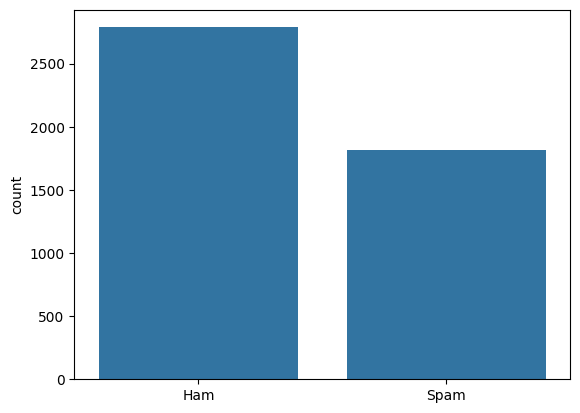

In [10]:
# Your Code goes here:
ax = sns.countplot(data=spambase, x='is_spam')
ax.set_xticklabels(['Ham', 'Spam'])
ax.set_xlabel('')
plt.show()

## Visualisation

Now we want to get a feeling for how the presence or absence of some specific words could affect the outcome (whether an email is classifed as *ham* or *spam*). We will be focusing on three specific words, namely `make`, `internet` and `edu`. As with Lab 1, we first transform the dataset by binarizing the values.

In [12]:
# Convert all features to boolen values
spambase_binary = spambase.copy(deep=True)
spambase_binary[spambase_binary > 0] = 1

### ========== Question 1.2 ==========

**a)** Using seaborn, produce one figure with three [countplots](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot), one for each of the frequency variables for the words `make`, `internet` and `edu`. For each variable, the count plot should have two bars: the number of emails containing the word (i.e. the variable = 1), and the number not containing that word (i.e. the variable = 0).

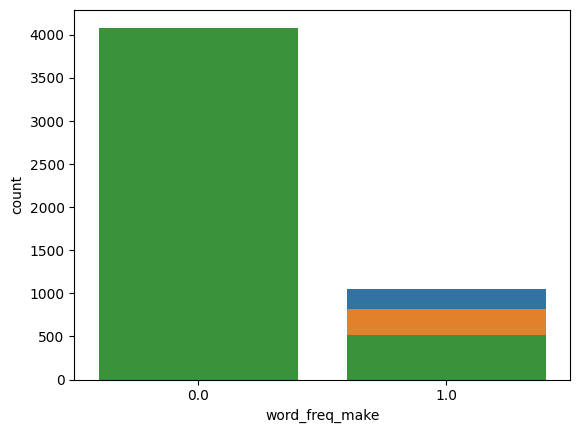

In [13]:
# Your Code goes here:
ax_make = sns.countplot(data=spambase_binary, x='word_freq_make')
ax_internet = sns.countplot(data=spambase_binary, x='word_freq_internet')
ax_edu = sns.countplot(data=spambase_binary, x='word_freq_edu')

**b)** Repeat the above but split the bars showing the proportion of emails that are spam/ham. *Hint*: This only requires you to use the `hue` input argument to use different colours for the `is_spam` variable.

In [ ]:
# Your Code goes here:
ax_make = sns.countplot(data=spambase_binary, x='word_freq_make')
ax_internet = sns.countplot(data=spambase_binary, x='word_freq_internet')
ax_edu = sns.countplot(data=spambase_binary, x='word_freq_edu')

## Part 2:  Dimensionality reduction using PCA

Now we will perform PCA on Landsat data. For information about the Landsat data you can read [this description](http://www.inf.ed.ac.uk/teaching/courses/dme/html/landsat.html).

### ========== Question 2.1 ==========
1. With pandas, read the csv dataset located at './datasets/landsat.csv'
1. Split the data into the features `X` (pandas dataframe), and the labels `y` (easier to make it a numpy array)
1. Give it a once over
    * Get a feel for the size
    * Check it looks ok
    * Understand what the features are
    * Plot the class distribution

*Hint: You might need to use the following class labels*:

In [ ]:
# Class Categories run from 1 through 7 inclusive (i.e. they are not 0 indexed!)
class_categories = ['red soil', 'cotton crop', 'grey soil', 'damp grey soil', 'soil with vegetation stubble',
                    'mixture class (all types present)', 'very damp grey soil']
class_labels = [1, 2, 3, 4, 5, 6, 7]

*TIP: Do not assume that all labels are present!*

In [ ]:
# Your Code goes here:


### ========== Question 2.2 ==========

*TIP - don't get stuck on this, move on after 10 mins or so (it's not critical)*

Plot a few datapoints. You'll need to understand and reshape the datapoints to do this. *Hint: try reading the [detailed description](http://www.inf.ed.ac.uk/teaching/courses/dme/html/satdoc.txt), it'll take you 2 minutes...`plt.imshow()` or `sns.heatmap()` (with an `ax.invert_yaxis()`) may also be handy ;)*

In [ ]:
# Your Code goes here:


## Principal component analysis (PCA)

The landsat data is 36 dimensional, so we cannot visualise it, with respect to class, on a nice two dimensional plot. Additionally, as dimensionality increases, euclidean distance [becomes less meaningful](https://en.wikipedia.org/wiki/Curse_of_dimensionality#Distance_function)...

Perhaps if we found a lower dimensional subspace the data lies upon, we could more easily distinguish the datapoints...

### ========== Question 2.3 ==========

Have a look at the [PCA example](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html) in the sklearn documentation. For more information about PCA and decomposition in general check out the sklearn [user guide on decomposition](https://scikit-learn.org/stable/modules/decomposition.html#pca).

We are going to project the data down to 2 dimensions and visualise it using PCA. 

1. Create `pca`, an instance of an [sklearn PCA object](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA), setting n_components to 2. 
1. Create `X_2d` by using the pca method `fit_transform()` and supplying the features `X` to fit and transform to 2d.

In [ ]:
# Your Code goes here:


### ========== Question 2.4 ==========

Let's visualise the data! Use a scatterplot and colour the datapoints by their class. You'll find [this example](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html) very helpful to adapt. 

In [ ]:
# Your Code goes here:
